In [0]:
# Lots of useful imports -- not all of which you will use!!
# And you might need others -- reach out to me and I can help with anything you're not sure how to do
# Be sure to use our previous assignments as a starting point.
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline

# Imports for kNN Classifier
from sklearn.neighbors import KNeighborsClassifier

# Imports for k-means clustering
from sklearn.cluster import KMeans

# Other useful sklearn imports
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [4]:
# Loading data from a CSV
dataframe = pd.read_csv('https://raw.githubusercontent.com/abby621/cs1070_materials/master/fl2019/demos/galton.csv')
dataframe

,family,father,mother,midparentHeight,children,childNum,gender,childHeight
0,1,78.5,67.0,75.43,4,1,male,73.2
1,1,78.5,67.0,75.43,4,2,female,69.2
2,1,78.5,67.0,75.43,4,3,female,69.0
3,1,78.5,67.0,75.43,4,4,female,69.0
4,2,75.5,66.5,73.66,4,1,male,73.5
...,...,...,...,...,...,...,...,...
929,203,62.0,66.0,66.64,3,1,male,64.0
930,203,62.0,66.0,66.64,3,2,female,62.0
931,203,62.0,66.0,66.64,3,3,female,61.0
932,204,62.5,63.0,65.27,2,1,male,66.5


In [0]:
# Getting the values of one column from the dataframe
father_heights = np.array(dataframe['father'])
mother_heights = np.array(dataframe['mother'])

In [17]:
# Getting the column headers for the dataframe
column_names = dataframe.columns

# Using a for loop to loop over column names:
for idx in range(len(column_names)):
  print('Column ' + str(idx) + ': ',column_names[idx])

Column 0:  family
Column 1:  father
Column 2:  mother
Column 3:  midparentHeight
Column 4:  children
Column 5:  childNum
Column 6:  gender
Column 7:  childHeight


In [14]:
# Getting just one row from the dataframe
row0 = dataframe.iloc[0]
row50 = dataframe.iloc[50]

row0_array = np.array(row0)
row50_array = np.array(row50)

print(row0_array, row50_array)

['1' 78.5 67.0 75.43 4 1 'male' 73.2] ['16' 73.0 65.0 71.6 9 2 'male' 70.5]


# Bar Charts

Text(0, 0.5, 'Median MidParent Height')

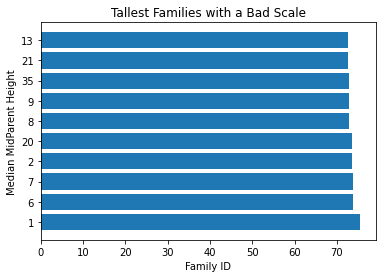

In [61]:
# Group the midparent dataframe by the family ID and take the median midparent height
family_midparent_height = dataframe.groupby('family')['midparentHeight'].median().sort_values(ascending=False)

# Get the ten tallest families
tallest_families = family_midparent_height.iloc[:10]

# Make a bar chart of these families median midparent heights
plt.barh(np.array(tallest_families.index), np.array(tallest_families))

# Add a title and axis labels to our plot
plt.title('Tallest Families with a Bad Scale')
plt.xlabel('Family ID')
plt.ylabel('Median MidParent Height')

Text(0, 0.5, 'Median MidParent Height')

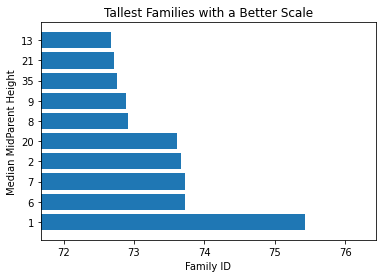

In [65]:
# Make a bar chart of these families median midparent heights
plt.barh(np.array(tallest_families.index), np.array(tallest_families))

shortest_of_the_tall_familes = min(np.array(tallest_families))
tallest_of_the_tall_familes = max(np.array(tallest_families))

plt.xlim([shortest_of_the_tall_familes - 1,tallest_of_the_tall_familes + 1])

# Add a title and axis labels to our plot
plt.title('Tallest Families with a Better Scale')
plt.xlabel('Family ID')
plt.ylabel('Median MidParent Height')

# Scatter Plots

Text(0, 0.5, 'Mother Heights')

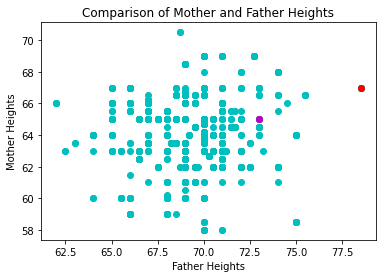

In [23]:
# Making a scatter plot comparing father heights vs mother heights
plt.scatter(father_heights, mother_heights, c='c')

# Draw the individual from row 0 in red, using the column name as the index
plt.scatter(row0['father'], row0['mother'],c='r')

# Draw the individual from row 50 in magenta, using integer indexing into the array
plt.scatter(row50_array[1], row50_array[2], c='m')

# Add a title and axis labels to our plot
plt.title('Comparison of Mother and Father Heights')
plt.xlabel('Father Heights')
plt.ylabel('Mother Heights')

# Histograms

Text(0, 0.5, 'Number of individuals')

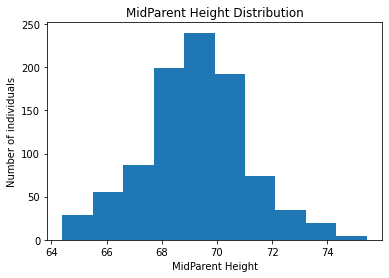

In [25]:
# Making a histogram of midparent heights
plt.hist(dataframe['midparentHeight'])

plt.title('MidParent Height Distribution')
plt.xlabel('MidParent Height')
plt.ylabel('Number of individuals')

Text(0, 0.5, 'Number of individuals')

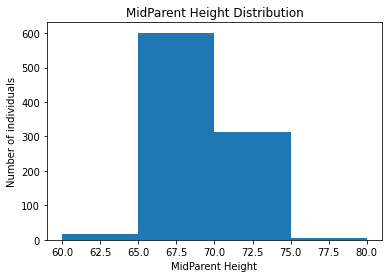

In [27]:
# Making a histogram of midparent heights with custom bins
plt.hist(dataframe['midparentHeight'], bins=[60,65,70,75,80])

plt.title('MidParent Height Distribution')
plt.xlabel('MidParent Height')
plt.ylabel('Number of individuals')

# Line Plots

In [29]:
# Loading data with data that varies by time
dataframe2 = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/nba-draft-2015/historical_projections.csv')
dataframe2

,Player,Position,ID,Draft Year,Projected SPM,Superstar,Starter,Role Player,Bust
0,Karl-Anthony Towns,C,karl-anthony-towns,2015,1.030606,0.134767,0.427183,0.163083,0.274967
1,Justise Winslow,SF,justise-winslow,2015,0.875329,0.083529,0.510905,0.176767,0.228800
2,Stanley Johnson,SF,stanley-johnson,2015,0.679493,0.067800,0.423733,0.278500,0.229967
3,Jahlil Okafor,C,jahlil-okafor,2015,0.521661,0.058717,0.409900,0.235533,0.295850
4,D`Angelo Russell,PG,d-angelo-russell,2015,0.511967,0.152033,0.342283,0.096583,0.409100
...,...,...,...,...,...,...,...,...,...
1085,Terrell Lyday,SG,terrell-lyday,2001,-1.486319,0.001152,0.018303,0.261035,0.719510
1086,Brandon Wolfram,SF,brandon-wolfram,2001,-1.493460,0.000271,0.011532,0.271560,0.716636
1087,Ruben Boumtje Boumtje,C,ruben-boumtje-boumtje,2001,-1.494069,0.000000,0.020653,0.236919,0.742427
1088,Greg Stevenson,SG,greg-stevenson,2001,-1.529188,0.000000,0.019693,0.238861,0.741446


Text(0, 0.5, 'Mean Probability of a Superstar')

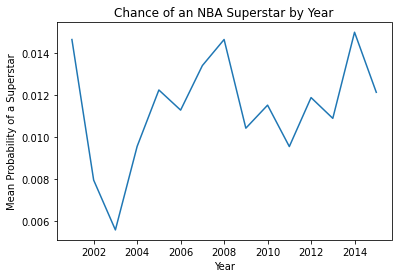

In [51]:
# Group the table by draft year, and get the average chance of a "superstar" in that year
mean_superstar = dataframe2.groupby('Draft Year')['Superstar'].mean()
mean_superstar_array = np.array(mean_superstar)

# Get the grouped labels (the unique years, in the same order as )
year_labels = np.array(mean_superstar.index)

# Add title and plot labels
plt.title('Chance of an NBA Superstar by Year')
plt.plot(year_labels, mean_superstar_array)
plt.xlabel('Year')
plt.ylabel('Mean Probability of a Superstar')